## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import sklearn as s

import matplotlib.pyplot as plt
import seaborn as sns

import keras as k
import tensorflow as tf

Using TensorFlow backend.


In [2]:
print ("++++ Versions ++++")
print ("pandas: ", pd.__version__)
print ("Numpy: ", np.__version__)
print ("Sklearn: ", s.__version__)
print ("Keras: ", k.__version__)
print ("Tensorflow: ", tf.__version__)
print ("Seaborn: ", sns.__version__)

print ()

if tf.test.gpu_device_name():
    print ("GPU:", tf.test.gpu_device_name())
else:
    print("CPU Version")

++++ Versions ++++
pandas:  1.3.5
Numpy:  1.21.6
Sklearn:  1.0.2
Keras:  2.3.1
Tensorflow:  1.15.5
Seaborn:  0.12.1

CPU Version



User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   OMP_NUM_THREADS=8

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_HAND_THREAD=false
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_FORKJOIN_FRAMES=true
   KMP_FORKJOIN_FRAMES_MODE=3
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_ITT_PREPARE_DELAY=0
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_IN

In [3]:
np.random.seed(7)
tf.random.set_random_seed(7)

## reading dataset

In [4]:
file_name = "pima_diabetes.csv"
col_names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

data = pd.read_csv(file_name, names = col_names)

data.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Data Preprocessing

In [5]:
print ("df.shape: \n\n", data.shape)
print ("df.columns: \n\n", data.columns)
print ("df.dtypes: \n\n", data.dtypes)
print ("df.isnull().sum(): \n\n", data.isnull().sum())

df.shape: 

 (768, 9)
df.columns: 

 Index(['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'], dtype='object')
df.dtypes: 

 preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object
df.isnull().sum(): 

 preg     0
plas     0
pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64


In [6]:
data.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## EDA

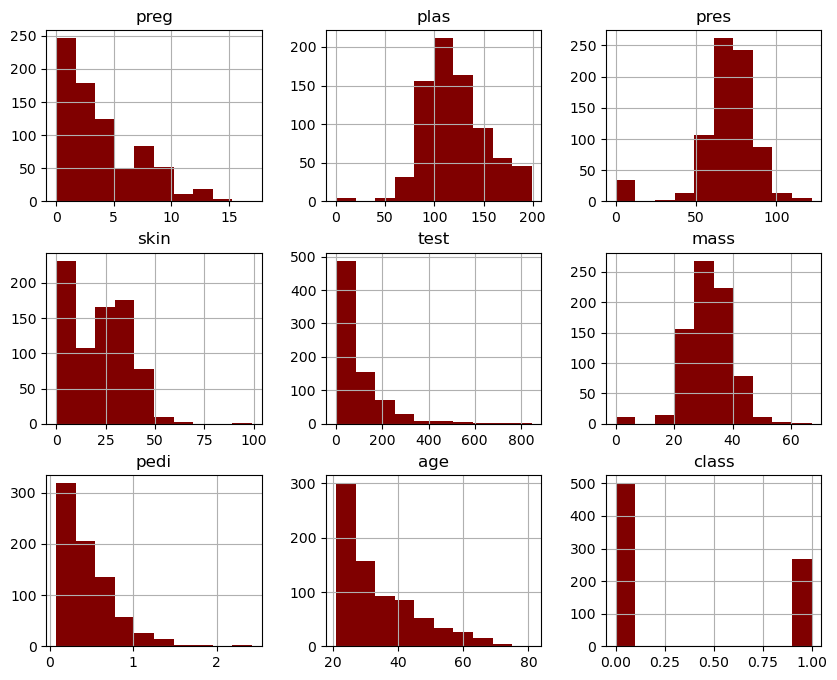

In [7]:
data.hist(figsize=(10, 8), color = 'maroon')
plt.show()

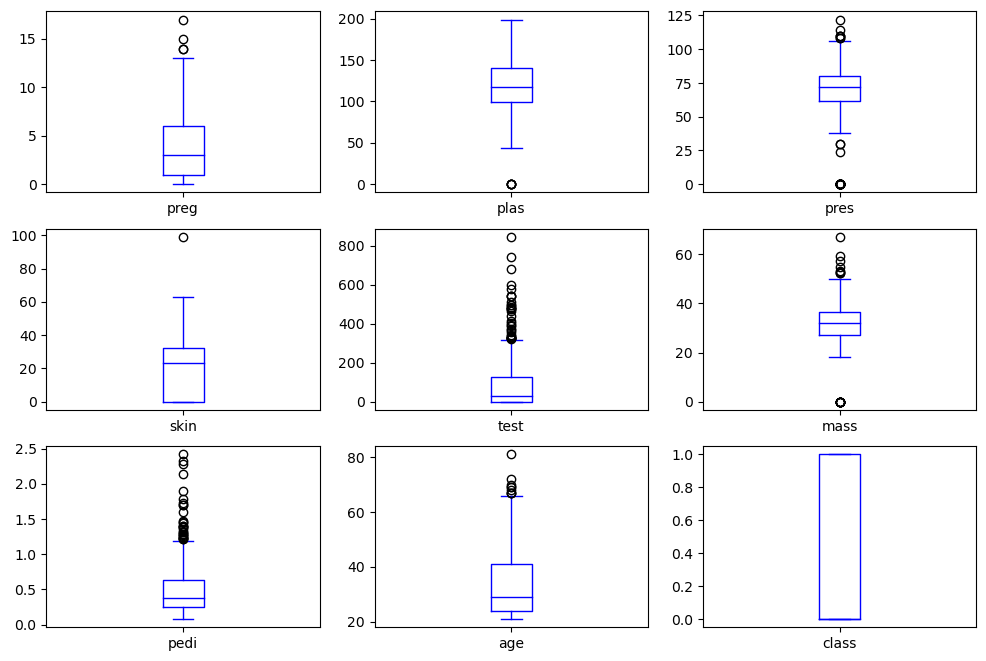

In [8]:
data.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, color = 'blue', figsize=(12, 8)) 
plt.show()

## independent and dependent variable split

In [9]:
X = data.drop("class", axis = 1 )
print (X.columns)

y = data["class"]
print (type(y))



Index(['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age'], dtype='object')
<class 'pandas.core.series.Series'>



## train test data split

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test_val, y_train, y_test_val  = train_test_split(X, y, test_size=.40, random_state=7)

X_val, X_test, y_val, y_test = train_test_split(X_test_val, y_test_val, test_size=.50, random_state =7)

print (" Training: ", X_train.shape, y_train.shape, 
       "\n validation: ", X_val.shape, y_val.shape, 
       "\n Test: ",X_test.shape, y_test.shape)



type(y_train)


 Training:  (460, 8) (460,) 
 validation:  (154, 8) (154,) 
 Test:  (154, 8) (154,)


pandas.core.series.Series

## Neural Network Modelling 

In [11]:
from keras.models import Sequential
from keras.layers import Dense



def sequential_model () :
    model = Sequential()
    model.add(Dense(16, input_dim=8,activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy',
                 optimizer='Adam',
                metrics=['accuracy'])
    
    return model

In [12]:
sequen_model = sequential_model()
history = sequen_model.fit(X_train,y_train, epochs=150,batch_size=32, validation_data=(X_val, y_val))



Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 460 samples, validate on 154 samples
Epoch 1/150


2023-09-18 04:37:02.663467: I tensorflow/core/common_runtime/process_util.cc:136] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


460/460 [==============================] - 1s 1ms/step - loss: 9.3140 - accuracy: 0.5957 - val_loss: 8.2467 - val_accuracy: 0.5649
Epoch 2/150
460/460 [==============================] - 0s 63us/step - loss: 7.2474 - accuracy: 0.6239 - val_loss: 6.2661 - val_accuracy: 0.5779
Epoch 3/150
 32/460 [=>............................] - ETA: 0s - loss: 4.2715 - accuracy: 0.6562

OMP: Info #212: KMP_AFFINITY: decoding x2APIC ids.
OMP: Info #210: KMP_AFFINITY: Affinity capable, using global cpuid leaf 11 info
OMP: Info #154: KMP_AFFINITY: Initial OS proc set respected: 0-7
OMP: Info #156: KMP_AFFINITY: 8 available OS procs
OMP: Info #157: KMP_AFFINITY: Uniform topology
OMP: Info #179: KMP_AFFINITY: 1 packages x 4 cores/pkg x 2 threads/core (4 total cores)
OMP: Info #214: KMP_AFFINITY: OS proc to physical thread map:
OMP: Info #171: KMP_AFFINITY: OS proc 0 maps to package 0 core 0 thread 0 
OMP: Info #171: KMP_AFFINITY: OS proc 4 maps to package 0 core 0 thread 1 
OMP: Info #171: KMP_AFFINITY: OS proc 1 maps to package 0 core 1 thread 0 
OMP: Info #171: KMP_AFFINITY: OS proc 5 maps to package 0 core 1 thread 1 
OMP: Info #171: KMP_AFFINITY: OS proc 2 maps to package 0 core 2 thread 0 
OMP: Info #171: KMP_AFFINITY: OS proc 6 maps to package 0 core 2 thread 1 
OMP: Info #171: KMP_AFFINITY: OS proc 3 maps to package 0 core 3 thread 0 
OMP: Info #171: KMP_AFFINITY: O

460/460 [==============================] - 0s 61us/step - loss: 5.5937 - accuracy: 0.6174 - val_loss: 4.8542 - val_accuracy: 0.5325
Epoch 4/150
460/460 [==============================] - 0s 59us/step - loss: 4.2041 - accuracy: 0.6174 - val_loss: 3.8782 - val_accuracy: 0.6169
Epoch 5/150
460/460 [==============================] - 0s 55us/step - loss: 3.3381 - accuracy: 0.6522 - val_loss: 3.2204 - val_accuracy: 0.6364
Epoch 6/150
460/460 [==============================] - 0s 60us/step - loss: 2.7873 - accuracy: 0.6609 - val_loss: 2.6661 - val_accuracy: 0.6234
Epoch 7/150
460/460 [==============================] - 0s 62us/step - loss: 2.3360 - accuracy: 0.6500 - val_loss: 2.1632 - val_accuracy: 0.6234
Epoch 8/150
460/460 [==============================] - 0s 60us/step - loss: 1.9503 - accuracy: 0.6609 - val_loss: 1.7652 - val_accuracy: 0.6558
Epoch 9/150
460/460 [==============================] - 0s 61us/step - loss: 1.6423 - accuracy: 0.6652 - val_loss: 1.4810 - val_accuracy: 0.6688
Epoc

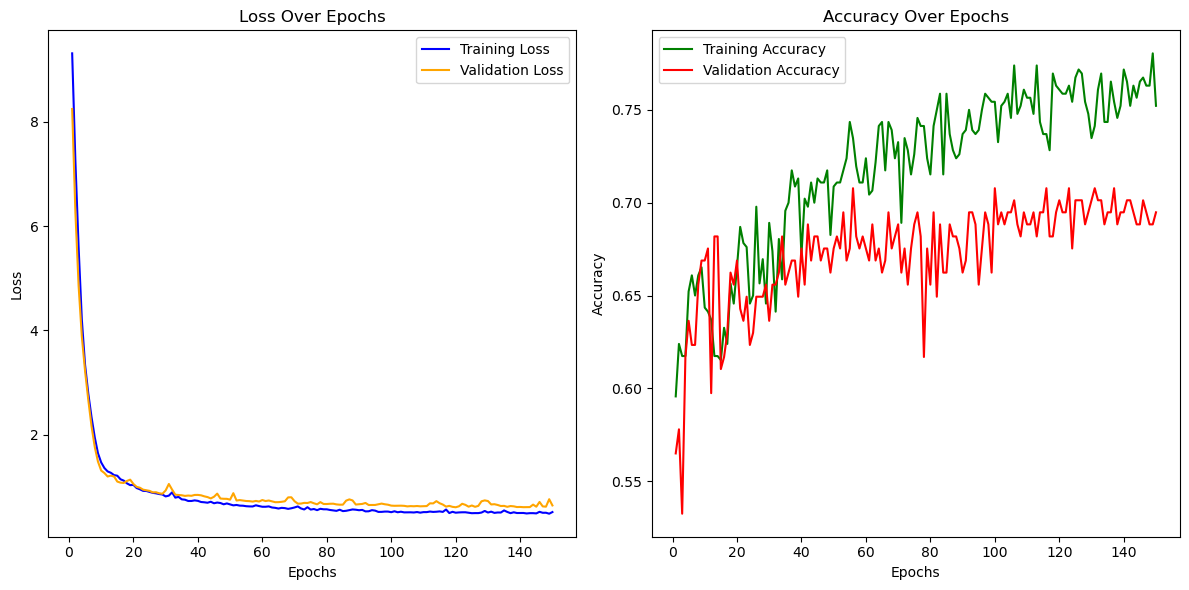

In [13]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

epochs_range = range(1, len(training_loss) + 1)

plt.figure(figsize=(12, 6))

# Subplot for Loss
plt.subplot(1, 2, 1)
plt.plot(epochs_range, training_loss, label='Training Loss', color='blue')
plt.plot(epochs_range, validation_loss, label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.legend()

# Subplot for Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs_range, training_accuracy, label='Training Accuracy', color='green')
plt.plot(epochs_range, validation_accuracy, label='Validation Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()

plt.tight_layout()
plt.show()

In [14]:
score = sequen_model.evaluate(X_test,y_test)
print("Model 1: 2 hidden layers" , sequen_model.metrics_names[1], score[1]*100)

154/154 [==============================] - 0s 29us/step
Model 1: 2 hidden layers accuracy 74.67532753944397


In [15]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold, cross_val_score

model_evaluation = KerasClassifier(build_fn=sequential_model, epochs=150, batch_size=32)

kfold = KFold(n_splits=10, shuffle=True, random_state=7)

results = cross_val_score(model_evaluation, X, y, cv=kfold, scoring="accuracy")

print(results.max(), results.std())

Epoch 1/150
691/691 [==============================] - 1s 790us/step - loss: 26.2319 - accuracy: 0.3430
Epoch 2/150
691/691 [==============================] - 0s 50us/step - loss: 14.4705 - accuracy: 0.3502
Epoch 3/150
691/691 [==============================] - 0s 47us/step - loss: 5.1307 - accuracy: 0.4399
Epoch 4/150
691/691 [==============================] - 0s 47us/step - loss: 2.3672 - accuracy: 0.6252
Epoch 5/150
691/691 [==============================] - 0s 46us/step - loss: 1.9775 - accuracy: 0.5890
Epoch 6/150
691/691 [==============================] - 0s 46us/step - loss: 1.7353 - accuracy: 0.5962
Epoch 7/150
691/691 [==============================] - 0s 46us/step - loss: 1.5569 - accuracy: 0.6049
Epoch 8/150
691/691 [==============================] - 0s 46us/step - loss: 1.3975 - accuracy: 0.5847
Epoch 9/150
691/691 [==============================] - 0s 46us/step - loss: 1.2448 - accuracy: 0.5745
Epoch 10/150
691/691 [==============================] - 0s 45us/step - loss: 1.

## Model improvement

In [29]:

def improved_sequential_model ():
    model = Sequential()
    model.add(Dense(7, input_dim=8,activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy',
                 optimizer='Adam',
                metrics=['accuracy'])
    
    return model


In [30]:
improved_sequential_model_obj = improved_sequential_model()
history2 = improved_sequential_model_obj.fit(X_train,y_train, epochs=150,batch_size=32, validation_data=(X_val, y_val))


Train on 460 samples, validate on 154 samples
Epoch 1/150
460/460 [==============================] - 1s 2ms/step - loss: 16.9318 - accuracy: 0.5109 - val_loss: 13.6948 - val_accuracy: 0.5584
Epoch 2/150
460/460 [==============================] - 0s 70us/step - loss: 14.9900 - accuracy: 0.5304 - val_loss: 12.6543 - val_accuracy: 0.5844
Epoch 3/150
460/460 [==============================] - 0s 69us/step - loss: 13.4144 - accuracy: 0.5348 - val_loss: 11.7256 - val_accuracy: 0.5974
Epoch 4/150
460/460 [==============================] - 0s 71us/step - loss: 12.0227 - accuracy: 0.5478 - val_loss: 10.7714 - val_accuracy: 0.5909
Epoch 5/150
460/460 [==============================] - 0s 73us/step - loss: 10.6893 - accuracy: 0.5630 - val_loss: 9.4131 - val_accuracy: 0.5844
Epoch 6/150
460/460 [==============================] - 0s 77us/step - loss: 9.4632 - accuracy: 0.5652 - val_loss: 8.3238 - val_accuracy: 0.6104
Epoch 7/150
460/460 [==============================] - 0s 75us/step - loss: 8.3078

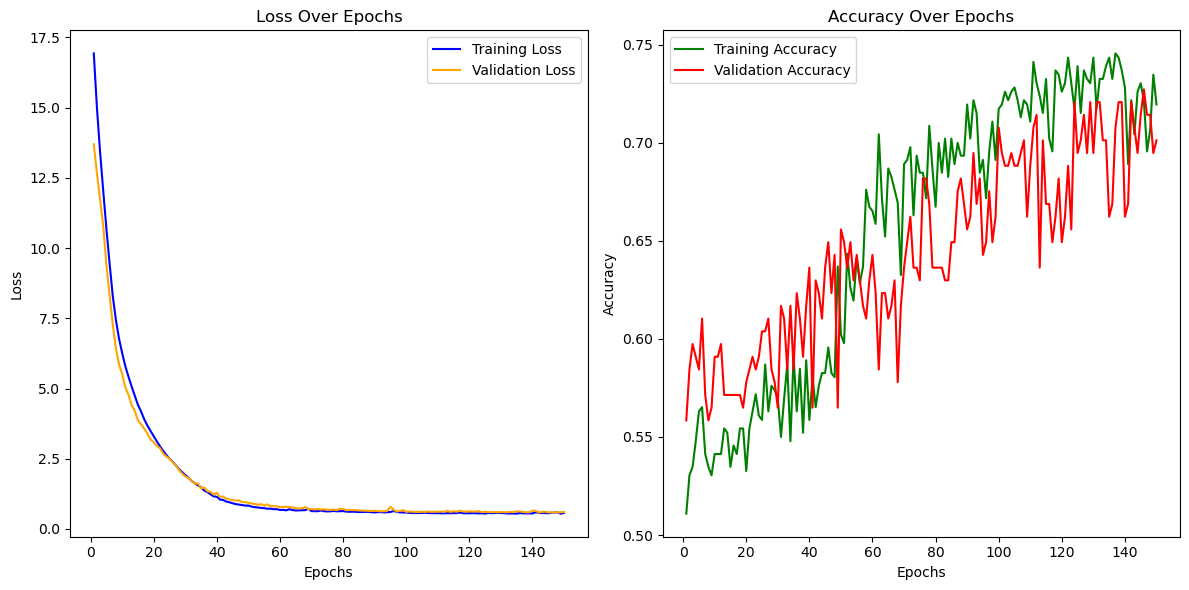

In [31]:
training_loss = history2.history['loss']
validation_loss = history2.history['val_loss']
training_accuracy = history2.history['accuracy']
validation_accuracy = history2.history['val_accuracy']

epochs_range = range(1, len(training_loss) + 1)

plt.figure(figsize=(12, 6))

# Subplot for Loss
plt.subplot(1, 2, 1)
plt.plot(epochs_range, training_loss, label='Training Loss', color='blue')
plt.plot(epochs_range, validation_loss, label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.legend()

# Subplot for Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs_range, training_accuracy, label='Training Accuracy', color='green')
plt.plot(epochs_range, validation_accuracy, label='Validation Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()

plt.tight_layout()
plt.show()

In [42]:
score = improved_sequential_model_obj.evaluate(X_test,y_test)
print("Improved Model : 2 hidden layers" , sequen_model.metrics_names[1], score[1]*100)

154/154 [==============================] - 0s 50us/step
Improved Model : 2 hidden layers accuracy 68.18181872367859
